**Downloading the Dependencies**


*   Here are all the libraries and Dependencies required for this project in a single cell.




In [ ]:
#Getting all the library and Dependencies here:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Loading the Data**

*   I have used Google Colab for my project and will be using the California Housing Prices dataset from Kaggle. Downloading and loading the data will be a different case for everybody. This Dataset was based on the 1990 California Census. Some of the metrics that are in the datasets are Longitude, Latitude, Population, Median Income, Median House Price and so on. I will be creating a model of Housing Prices using this dataset.


In [ ]:
#@ Loading the dataset
path = '/content/drive/MyDrive/housing.csv'
housing = pd.read_csv(path)

#@ Inspecting the data:
housing.head(7)                                             #Inspecting...

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


**Exploratory Data Analysis**

*   The analysis shows us that the DataFrame has 20640 rows. We can also see that we have 10 features in the dataset where 9 are numerical and 1 is categorical. Info is a quick way to get a description of the data.



In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Exploratory Data Analysis**

*   The analysis shows us that the DataFrame has 20640 non-null values except for total_bedrooms. It means values for 207 districts are missing. Also, the ocean_proximity has the datatype of an object which means this attribute is repetitive and is most likely to be a categorical attribute. In this case, Value Counts menthod can be used to find the number of districts and categories belonging to a particular category.



In [ ]:
#@ Exploratory Data Analysis
print(housing['ocean_proximity'].value_counts())            #Inspecting the Categorical Attribute
print("\n")
print(housing.describe())                                   #Getting a description of the data

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.38

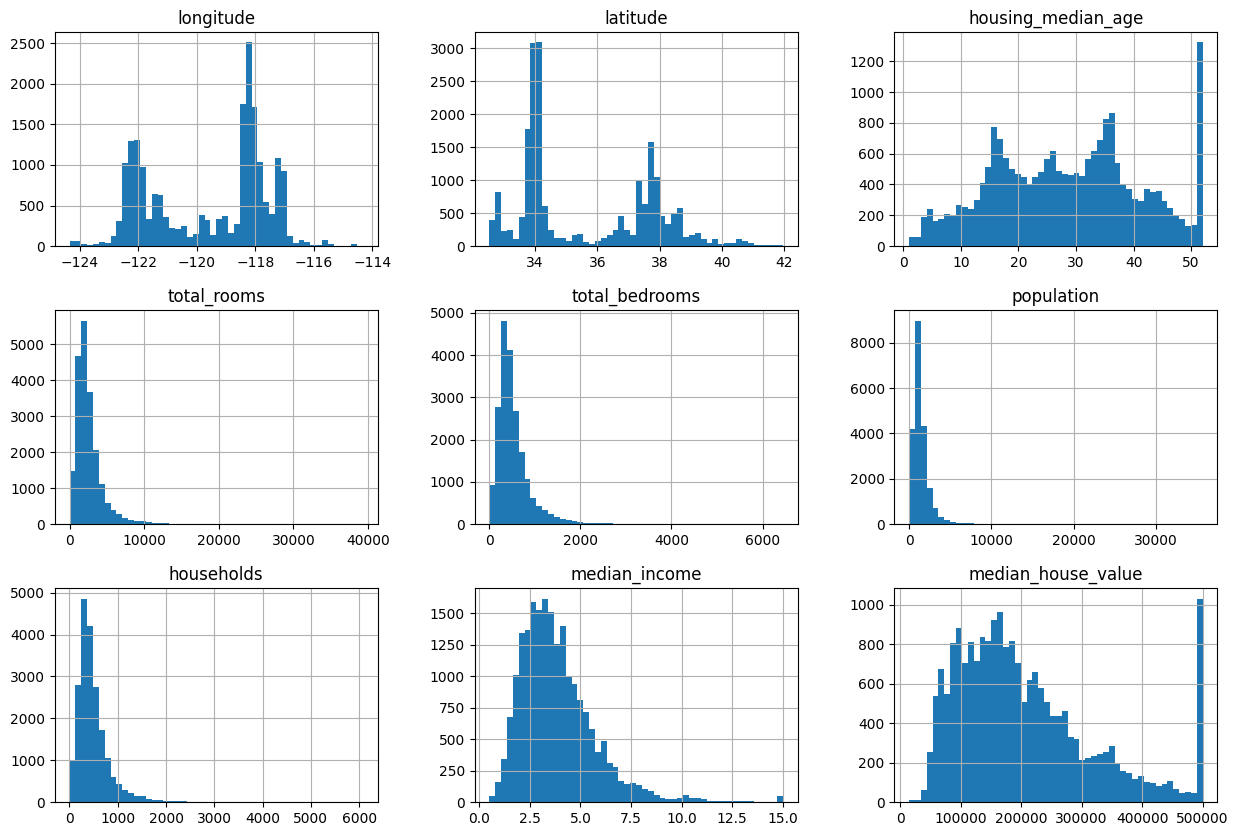

In [ ]:
#@ Visualizing the numerical attributes
housing.hist(bins = 50, figsize= (15, 10))
plt.savefig("Histogram")                                     #Saving the figure
plt.show()

**Data Processing**
* I will be splitting train and test dataset right now. Why? We are highly prone to overfitting because we are very good at detecting patterns. In most instances this leads us to selecting a particular kind of ML model. Take a deeper look at [data snoopiong bias](https://datascience.stanford.edu/news/data-snooping) for more information.

In [ ]:
#@ Splitting the Dataset:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 11)

#@ Inspection:
print(f"Train Set Size: {len(train_set)}")          #Number of Training Data

print(f"\nTest Set Size: {len(test_set)}")          #Number of Testing Data

IPython.display.display(train_set.head(4))
IPython.display.display(test_set.head(4))



Train Set Size: 16512

Test Set Size: 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20025,-119.05,36.07,21.0,2472.0,523.0,1238.0,504.0,1.7756,62900.0,INLAND
10772,-117.89,33.66,32.0,2736.0,550.0,1279.0,534.0,5.5422,253100.0,<1H OCEAN
16691,-120.61,35.13,16.0,3431.0,721.0,1777.0,701.0,2.7301,190400.0,<1H OCEAN
11946,-117.43,33.93,31.0,1273.0,262.0,686.0,254.0,2.4922,109400.0,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2734,-115.56,32.78,34.0,2856.0,555.0,1627.0,522.0,3.2083,76200.0,INLAND
9087,-118.17,34.66,9.0,1561.0,253.0,731.0,233.0,5.7049,173200.0,INLAND
15789,-122.40,37.78,52.0,464.0,202.0,286.0,148.0,1.6125,112500.0,NEAR BAY
12992,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,137000.0,INLAND


**Exploratory Data Analysis**

* I will be taking a closer look at median_income because it is closely related with median_house_value. The values of median_income is cluttered between 2 and 6 but there are other income values beyond 6. I will create a new income category attribute with 5 categories which will be labelled from 1 to 5. This is created for stratified sampling which will give us proportional representation of each income category which means less bias.


<Axes: >

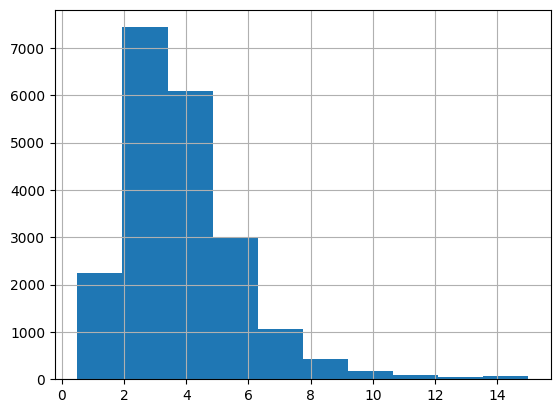

In [ ]:
#@ Visualizing median_income closely
housing["median_income"].hist()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64




<Axes: >

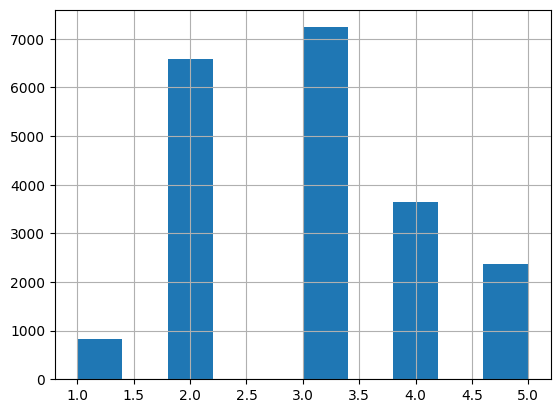

In [ ]:
#@ Creating income category for Stratified Sampling.

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])

print(housing["income_cat"].value_counts())
print("\n")
housing["income_cat"].hist()


**Stratified Sampling**

* I will be using Scikit Learn's StratifiedShuffleSplit class.

In [ ]:
#@ Stratified Sampling on the basis of Income Category:
from sklearn.model_selection import StratifiedShuffleSplit
import IPython.display

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

#@ Calculating proportions for Stratified Split
strat_props = strat_test_set["income_cat"].value_counts() / len(strat_test_set)                 #Income Category in Test Set

#@ Calculate proportions for the Overall Dataset
overall_props = housing["income_cat"].value_counts() / len(housing)

#@ Generate a Random Split for comparison purposes
train_set_rand, test_set_rand = train_test_split(housing, test_size=0.2, random_state=11)       #Splitting the dataset
random_props = test_set_rand["income_cat"].value_counts() / len(test_set_rand)

#@ Create the Comparison DataFrame
compare_props = pd.DataFrame({
    "Overall": overall_props,
    "Stratified": strat_props,
    "Random": random_props
}).sort_index()

#@ # Calculate % Error
compare_props["Random % Error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Stratified % Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

#@ Display the results
print("Comparison of Income Category Proportions:")
IPython.display.display(compare_props)
print("\n")

Comparison of Income Category Proportions:


,Overall,Stratified,Random,Random % Error,Stratified % Error
income_cat,,,,,
1,0.039826,0.039971,0.032946,-17.274939,0.364964
2,0.318847,0.318798,0.312984,-1.838626,-0.015195
3,0.350581,0.350533,0.353440,0.815368,-0.013820
4,0.176308,0.176357,0.184835,4.836494,0.027480
5,0.114438,0.114341,0.115795,1.185436,-0.084674


In [ ]:
#@ Dropping the 'income_cat' cloumn

for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

train_set = strat_train_set
test_set = strat_test_set

print(f"Stratified Train Set Size: {len(train_set)}")
print(f"Stratified Test Set Size: {len(test_set)}")

Stratified Train Set Size: 16512
Stratified Test Set Size: 4128


**Visualizing the Geographical Data**
* A Scatter Plot to visualize the housing density is the best way to look at the data more closely.

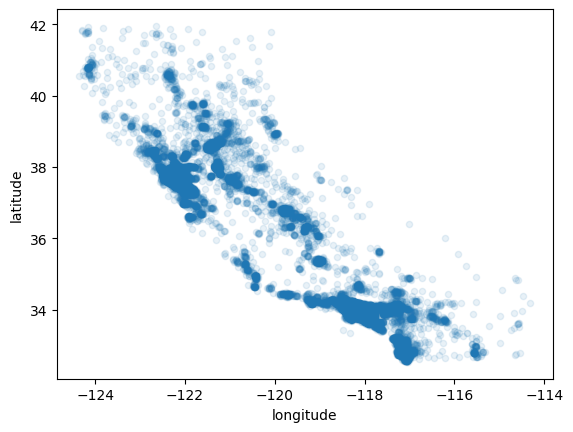

In [ ]:
#@ Visualization of the Geographical Data:

housing = strat_train_set.copy()         #Working on a copy of the training set
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)
plt.savefig("Geographical Data")
plt.show()

* We can look at the Housing prices. Each circle represents the district's population which is labelled as 's'. 'c' is color which represents our median_house_value. Jet is a predefined color map availabe which has 2 values blue and red representing low values and high values respectively.

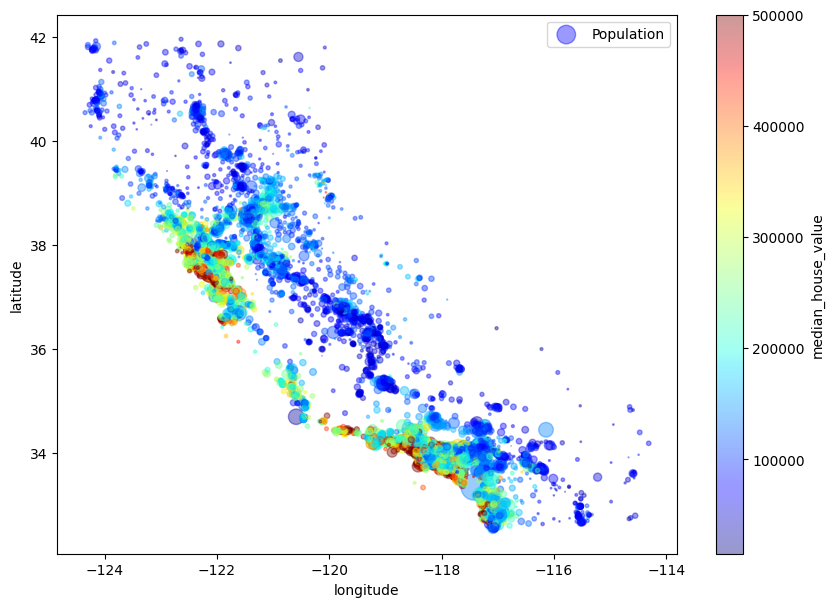

In [ ]:
#@ Visualizing the Housing Prices
housing.plot(kind = "scatter", x = "longitude", y= "latitude", alpha = 0.4, s=housing["population"]/100, label = "Population", figsize=(10,7), c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
plt.savefig("HousingPrices")
plt.show()

* The plot shows us that Housing prices are very dependant on the location of the property. It is also closely related to population density.

**Correlations**
*I will use corr method to compute the standard correlation between every pair of attributes.


In [ ]:
#@ Correalations:

corr_matrix = housing.corr(numeric_only = True)
print(corr_matrix["median_house_value"].sort_values(ascending = False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


* I will use Pandas' scatter matrix function to check the Correlations between attributes. This will plot every numerical attribute to another numerical attribute to see the correalation. I will be focusing on strongly correlated attributres.

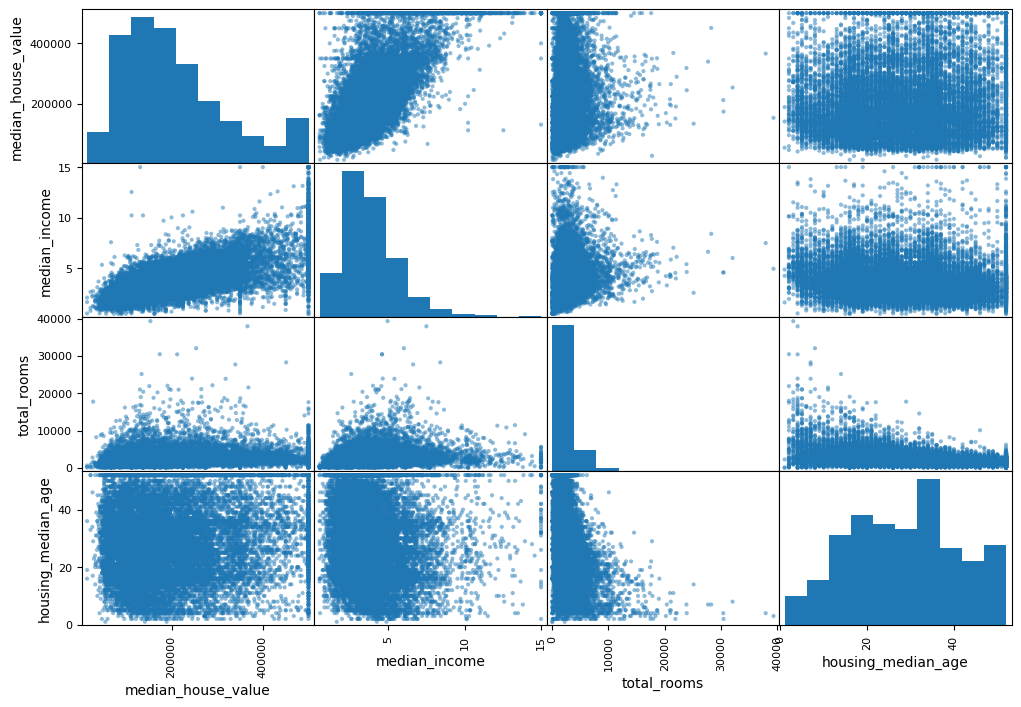

In [ ]:
#@ Correalations using Scatter Matrix:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize= (12,8))
plt.savefig("Scatter Matrix")
plt.show()

* We can observe from the plot above that the best attribute to predict median_house_value is median_income. We can take a closer look down below.  

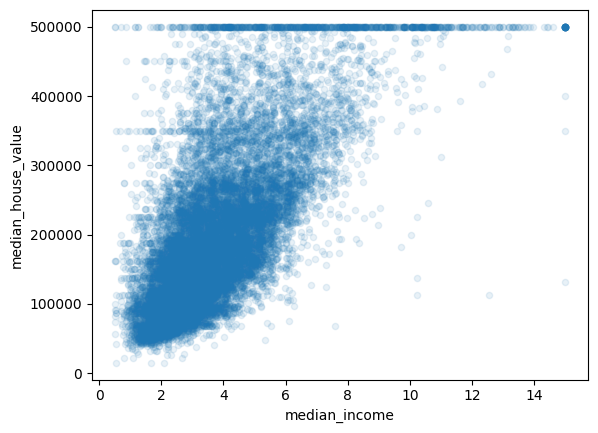

In [ ]:
#@ Correalations between Median House Value and Median Income:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)
plt.savefig("Corr Median House value and Median Income")
plt.show()

**Attribute Combinations Experiment**

* Total number of bedroom is not a useful information for us if we don't know the number of household. We need total number of rooms per household. For that we have to also compare total number of bedrooms with total number of rooms.

In [ ]:
#@ Attribute Combinations:
housing["room_per_household"] = housing["total_rooms"]/housing["households"]          #Total number of Rooms per Household

housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["total_rooms"]  #Total number of Bedrooms per Room

housing["population_per_household"] = housing["population"]/housing["households"]     #Total Population per Household

#@ Inspecting the correlations:
corr_matrix = housing.corr(numeric_only = True)
print(corr_matrix["median_house_value"].sort_values(ascending = False))

#@ Inspecting the Data:
print("\n")
housing.describe()

median_house_value          1.000000
median_income               0.687151
room_per_household          0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_household     -0.259952
Name: median_house_value, dtype: float64




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedrooms_per_household,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [ ]:
#@ Preaparing the Data:
housing = strat_train_set.drop("median_house_value", axis = 1)      #Drop the lables from the Traning set.
housing_labels = strat_train_set["median_house_value"].copy()

**Data Cleaning**

* Machine Learning Algorithms cannot work with missing attributes. Previously, we saw that total bedrooms attribute has some missing values. There are 3 different ways to get rid of the missing values.

  * Get rid of the corresponding districts.
  * Get rid of the whole attribute.
  * Set the values to some value (zero, the mean, the median, etc.).


In [ ]:
#@ Working on the missing values:
incomplete_rows = housing[housing.isnull().any(axis=1)].head()
IPython.display.display(incomplete_rows)                          #Inspecting the missing values

incomplete_rows_dropped = incomplete_rows.dropna(subset=["total_bedrooms"], axis = 0) # Getting rid of corresponding districts

median = housing["total_bedrooms"].median()                        #Calculating the median

incomplete_rows["total_bedrooms"].fillna(median, inplace = True)  #Filling the median values

print("\nRows after filling NaNs in total_bedrooms with median:") #Inspecting the data after filling the missing values with median
IPython.display.display(incomplete_rows)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN



Rows after filling NaNs in total_bedrooms with median:


/tmp/ipython-input-1170037719.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  incomplete_rows["total_bedrooms"].fillna(median, inplace = True)  #Filling the median values


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


**Data Cleaning**

* Scikit Learn has a class which helps us fill the missing values: SimpleImputer.
I'll create an instance and replace all the missing values with median of the attribute. Median can only be calculated on the numerical arributes hence, I'll work on a copy of the data without ocean proximity.

In [ ]:
#@ Missing Values:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")                           #Instantiating the Imputer
housing_num = housing.drop("ocean_proximity", axis=1)                  #Removing the Text Attribute
imputer.fit(housing_num)                                               #Fitting the imputer into Trainig Data
print(imputer.statistics_)

print(housing_num.median().values)                                     #Inspecting the median values
X = imputer.transform(housing_num)                                     #Transforming the Traning data set with trained Imputer
housing_imputed = pd.DataFrame(X, columns = housing_num.columns)       #Createing the DataFrame with numpy arrays
print("\n")
IPython.display.display(housing_imputed.head())




[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


**Handling Text and Categorical Attribute**
* We only took care of the numerical attributes previously. Now, we will be looking at the text attribute and in this case, we only have one: Ocean Proximity. I'll use Scikit Learns' Ordinal Encoder Class to convert all the categorical attributes into numbers.

In [ ]:
#@ Handling Text and Categroical Attribute:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
print(housing_cat.head())                                         #Inspecting the Categorical attribute
ordinal_encoder = OrdinalEncoder()                                #Instantiating the Encoder
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)  #Encoding the Text
IPython.display.display(housing_cat_encoded[:10])                 #Inspecting the Encoded Text
print("\n")
print(ordinal_encoder.categories_)                                #Inspecting the Categories


      ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])



[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


* There is an issue with how we have representated the values. ML Algorithms assumes that two nearby values are more similar than two distant values. While true in some instances ('bad', 'good', 'excellent'). That is not the case in Ocean Proximity.
I will apply One Hot Encoding which provides OneHotEncoder class to convert all the Categroical values into One Hot Vectors. They are called dummy attributes.

In [ ]:
#@ One Hot Encoding:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output = False)                #Instantiating OneHotEncoder
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)       #Encoding the text
print(housing_cat_onehot[:10])
print("\n")
print(cat_encoder.categories_)                                    #Inspecting the list of categories

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


**Custom Transformers**
* I'll be adding custom Transformers for extra attributes which will help us be more accurate.

In [ ]:
#@ Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)                          # Instantiating the Transformer.
housing_extra_attrs = attribute_adder.transform(housing.values)

#@ Getting the columns indices:
col_names = ["total_rooms", "total_bedrooms", "population", "households"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [
  housing.columns.get_loc(c) for c in col_names
]

#@ Creating the DataFrame:
housing_extra_attrs = pd.DataFrame(
    housing_extra_attrs,
    columns = list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index = housing.index
)
#@ Inspecting the DataFrame:
housing_extra_attrs.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,NEAR BAY,4.789683,2.873016
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN,6.585023,2.780031


**Feature Scaling**
* We have to apply feature scaling in our data because ML algorithims doesn't perform well when the input numerical attributes have very different scales. We hav two common ways to get the same scale:
  * Min-Max Scaling (Normalization)
  * Standarization

* Inorder to simply the many steps on Data Transformation, We will use Sciki Learn's Pipeline class to create a proper sequence.

In [ ]:
#@ Transformation Pipelines:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#@ Pipeline for Numerical attributes:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

#@ Inspecting the Transformations:
housing_num_tr[:10]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178,  0.2512412 ,  0.00610923,
        -0.47451338],
       [-1.23109441,  1.08549869, -0.05196285, -0.66197687, -0.68632833,
        -0.62358295, -0.6521739 , -0.09422376, -0.24916496, -0.01928904,
        -0.075

* We have been handling the Categorical and Numerical Columns separetely until now. It's easier to have a single Transformer handle all the columns applying appropriate transmformations to each column. Scikit Learn has ColumnTransformer class which we will apply to all the Transformations to the Housing Data.

In [ ]:
#@ Implementation of ColumnTransformer:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)                           # List of Numerical attributes

cat_attribs = ["ocean_proximity"]                         # List of Categorical attributes

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(sparse_output=False), cat_attribs)
])

housing_prepared = pipeline.fit_transform(housing)

#@ Inspecting the Transformers:
print(housing_prepared[:10])
print(housing_prepared.shape)

[[-0.94135046  1.34743822  0.02756357  0.58477745  0.64037127  0.73260236
   0.55628602 -0.8936472   0.01739526  0.00622264 -0.12112176  0.
   1.          0.          0.          0.        ]
 [ 1.17178212 -1.19243966 -1.72201763  1.26146668  0.78156132  0.53361152
   0.72131799  1.292168    0.56925554 -0.04081077 -0.81086696  0.
   0.          0.          0.          1.        ]
 [ 0.26758118 -0.1259716   1.22045984 -0.46977281 -0.54513828 -0.67467519
  -0.52440722 -0.52543365 -0.01802432 -0.07537122 -0.33827252  0.
   1.          0.          0.          0.        ]
 [ 1.22173797 -1.35147437 -0.37006852 -0.34865152 -0.03636724 -0.46761716
  -0.03729672 -0.86592882 -0.59513997 -0.10680295  0.96120521  0.
   0.          0.          0.          1.        ]
 [ 0.43743108 -0.63581817 -0.13148926  0.42717947  0.27279028  0.37406031
   0.22089846  0.32575178  0.2512412   0.00610923 -0.47451338  1.
   0.          0.          0.          0.        ]
 [-1.23109441  1.08549869 -0.05196285 -0.6619

**Training the Model**
* I will train the Machine Learning Model.

In [ ]:
#@ Training the Model:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()                              #Instantiating the Model
lin_reg.fit(housing_prepared, housing_labels)             #Training the Linear Model

#@ Inspecting the Model on few instances:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_prepared = pipeline.transform(some_data)
print(f"Predictions: {lin_reg.predict(some_prepared)}")   #Inspecting the Predictions
print(f"Labels: {list(some_labels)}")


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
#@ Closer look at the Errors:
from sklearn.metrics import mean_squared_error, mean_absolute_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)                                                          #Inspecting the root mean squared error

lin_mae = mean_absolute_error(housing_labels, housing_prediction)
print(lin_mae)                                                           #Inspecting the mean absolute error


68627.87390018745
49438.66860915802


**Decision Trees**
* The obtained score is not very satisfying. The  median hous
ing values range between $120,000 and $265,000 so, error of $68627 is not a good one. It's clear that our Model is underfitting the training data. The features doesn't provide enough information to make good predictions.

* We can tackle this by selecting a more powerful model to feed the training algorithm with better features or by reducing the constrains on the model.

* I'll try a more complex model which is DecisionTreeRegressor before deciding on complicating it any further.


In [ ]:
#@ Implementation of Decision Trees:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 11)           #Instantiating the Model
tree_reg.fit(housing_prepared, housing_labels)                #Training the Model
housing_prediction = tree_reg.predict(housing_prepared)      #Making Predictions

tree_mse = mean_squared_error(housing_labels, housing_prediction)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)                                              #Inspecting the Root Mean Squared Error

0.0


* The result tells us that there are no errors. It means that the Model has baldy overfit the Data. I'll use part of the training set for training and Model Validation of the data.

**Cross Validation**
* I'll use Scikit Learn's Corss-Validation feature which splits the traning set into subsets called folds. It trains and evaluates the Decision Tree model, picking a different fold for evaluation every time and trining on the other remaining folds.

* Cross-Validation expects a utility function (greater is better) rather than cost function (lower is better). Hence, the scoring function is opposite of MSE which is a negative value. I will use minus sign before calculation of square root for this reason.

In [ ]:
#@ Implementation of Cross Validation with Decision Trees:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

#@ Inspecting the Results:
def display_scores(scores):
  print(f"Scores: {scores}")
  print(f"Mean: {scores.mean()}")
  print(f"Standard Deviation: {scores.std()}")

display_scores(tree_rmse_scores)                              #Inspecting the scores

#@ Implementation of Cross Validation with Linear Regression:
print("\n")
lin_scores= cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)                               #Inspecting the scores

Scores: [72245.94614105 69219.13480855 69507.37626747 72004.10673002
 68106.4397735  77285.38495403 72048.80518577 73846.31128012
 69566.5579257  70243.58659565]
Mean: 71407.36496618605
Standard Deviation: 2569.1965443766762


Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation: 2880.3282098180694


* The results above shows us that Decision Tree Model is overfitting and performs worse than Linear Regression Model.

**Random Forest Regressor**
* Random Forests work by training many Decision Trees on a random subsets of the features and then averages out the predictions. I'll build a model on top of other models. This is called Ensemble Learning and this is a great way to push Machine Learning Algorithms.

In [ ]:
#@ Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 160, min_samples_leaf = 3, n_jobs = -1, random_state = 42)                  #Instantiating the Model
forest_reg.fit(housing_prepared, housing_labels)                                                                              #Training the Model
housing_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_prediction)                                                           #Calculating mean squared error
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)                                                                                                            #Inspecting the root mean squared error
print("\n")

#@ Random Forest Regressor with Cross Validation:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_scores_rmse = np.sqrt(-forest_scores)
display_scores(forest_scores_rmse)                                                                                            #Inspecting the scores                                                                     #Inspecting the scores


27721.962704061087


Scores: [51537.44644114 48652.38768506 46540.95280581 52149.30883492
 47142.82796449 51387.3530314  52089.39931894 49830.72242666
 48443.56622348 53994.04142916]
Mean: 50176.80061610752
Standard Deviation: 2308.8748302001177


* This score looks much more promising.

* We should always save every model so that we can always access it easily. I'll save the models by using the joblib library which is more effictive at serializing large Numpy arrays.

In [ ]:
#@ Saving the Random Forest Model:
import joblib
joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

**Grid Search and Tuning the Model**
* I'll use Scikit Learn's Grid Search to fine tune the data. I can tell which hyperparameters I want to experiment with and what values to try and it will evaluate all possible combinations of hyperparameters using CV.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [30, 60, 90, 120], "max_features": [2,3,4]},
    {"bootstrap": [False], "n_estimators": [90, 120], "max_features": [2,3,4]}
]
forest_reg = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

#@ Inspecting the Results:
print(grid_search.best_params_)
print("\n")
print(grid_search.best_estimator_)
print("\n")

#@ Inspecting the Scores:
cvresults = grid_search.cv_results_
for mean_score, params in zip(cvresults["mean_test_score"], cvresults["params"]):
  print(np.sqrt(-mean_score), params)
print("\n")
IPython.display.display(pd.DataFrame(grid_search.cv_results_))

{'bootstrap': False, 'max_features': 4, 'n_estimators': 90}


RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=90,
                      random_state=42)


52885.86715332332 {'max_features': 2, 'n_estimators': 30}
52018.42105537132 {'max_features': 2, 'n_estimators': 60}
51786.933236923636 {'max_features': 2, 'n_estimators': 90}
51832.04021515578 {'max_features': 2, 'n_estimators': 120}
51518.32314375803 {'max_features': 3, 'n_estimators': 30}
50800.432257794935 {'max_features': 3, 'n_estimators': 60}
50510.654077662744 {'max_features': 3, 'n_estimators': 90}
50430.218190164254 {'max_features': 3, 'n_estimators': 120}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
49572.021726972845 {'max_features': 4, 'n_estimators': 60}
49457.48228453771 {'max_features': 4, 'n_estimators': 90}
49554.17998913511 {'max_features': 4, 'n_estimators': 120}
50939.042904549526 {'bootstrap': False, 'max_features': 2, 'n_estimators': 90}
50916.44947476079 {'bootstrap': False, 'ma

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.092817,0.449585,0.051915,0.002054,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,18,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
1,2.689978,0.363092,0.082177,0.008294,2,60,NaN,"{'max_features': 2, 'n_estimators': 60}",-2.715698e+09,-2.602477e+09,...,-2.705916e+09,7.932314e+07,17,-3.942958e+08,-3.932982e+08,-4.093106e+08,-4.004579e+08,-3.876058e+08,-3.969937e+08,7.386120e+06
2,3.666475,0.434109,0.115985,0.002147,2,90,NaN,"{'max_features': 2, 'n_estimators': 90}",-2.696961e+09,-2.571206e+09,...,-2.681886e+09,8.675417e+07,15,-3.820950e+08,-3.834016e+08,-3.889080e+08,-3.856011e+08,-3.772029e+08,-3.834417e+08,3.880223e+06
3,5.038995,0.422762,0.158722,0.008936,2,120,NaN,"{'max_features': 2, 'n_estimators': 120}",-2.700128e+09,-2.569325e+09,...,-2.686560e+09,8.749186e+07,16,-3.764427e+08,-3.801225e+08,-3.864256e+08,-3.806092e+08,-3.744718e+08,-3.796144e+08,4.102355e+06
4,1.720572,0.201039,0.046122,0.004868,3,30,NaN,"{'max_features': 3, 'n_estimators': 30}",-2.648150e+09,-2.568034e+09,...,-2.654138e+09,9.148622e+07,14,-4.071473e+08,-4.071182e+08,-4.013702e+08,-4.054223e+08,-4.066314e+08,-4.055379e+08,2.175630e+06
5,3.285968,0.224780,0.081303,0.005351,3,60,NaN,"{'max_features': 3, 'n_estimators': 60}",-2.579530e+09,-2.502653e+09,...,-2.580684e+09,8.794888e+07,11,-3.738130e+08,-3.759452e+08,-3.711871e+08,-3.719381e+08,-3.678903e+08,-3.721547e+08,2.693928e+06
6,5.206615,0.570149,0.122972,0.007133,3,90,NaN,"{'max_features': 3, 'n_estimators': 90}",-2.555928e+09,-2.502067e+09,...,-2.551326e+09,8.461689e+07,10,-3.630423e+08,-3.661987e+08,-3.616861e+08,-3.624667e+08,-3.570632e+08,-3.620914e+08,2.944870e+06
7,6.659509,0.476523,0.158505,0.016975,3,120,NaN,"{'max_features': 3, 'n_estimators': 120}",-2.564488e+09,-2.476541e+09,...,-2.543207e+09,7.563914e+07,9,-3.597717e+08,-3.622860e+08,-3.598859e+08,-3.573281e+08,-3.521156e+08,-3.582775e+08,3.457104e+06
8,2.117066,0.279293,0.042436,0.004576,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,8,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
9,4.019050,0.371850,0.081282,0.010481,4,60,NaN,"{'max_features': 4, 'n_estimators': 60}",-2.490216e+09,-2.366469e+09,...,-2.457385e+09,8.291166e+07,7,-3.516469e+08,-3.625621e+08,-3.616777e+08,-3.516804e+08,-3.574771e+08,-3.570088e+08,4.690404e+06


**Analyzing the Best Models and their Errors**


In [112]:
#@ Analyzing the Best Models and Errors:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = pipeline.named_transformers_["cat"]
cat_onehot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_onehot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(np.float64(0.2761651137164428), 'median_income'),
 (np.float64(0.13582165788283895), 'INLAND'),
 (np.float64(0.09852914489589097), 'population_per_household'),
 (np.float64(0.09467356411420572), 'longitude'),
 (np.float64(0.09228220574019957), 'bedrooms_per_room'),
 (np.float64(0.08664850714373586), 'latitude'),
 (np.float64(0.06200302946192197), 'rooms_per_household'),
 (np.float64(0.041335252187883274), 'housing_median_age'),
 (np.float64(0.021551386332715673), 'population'),
 (np.float64(0.021075344338792157), 'total_rooms'),
 (np.float64(0.01902703974950268), 'total_bedrooms'),
 (np.float64(0.01890533089441696), 'households'),
 (np.float64(0.017976675833139326), '<1H OCEAN'),
 (np.float64(0.007898520627976644), 'NEAR OCEAN'),
 (np.float64(0.006040192305779568), 'NEAR BAY'),
 (np.float64(6.70347745578226e-05), 'ISLAND')]

* With the results above, I will drop some less useful attributes i.e ocean proximity. Apparently only one ocean proximity is useful.

**Evaluating the System on Testset**

In [114]:
#@ Evaluating the System on Testset:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()
#@ Preparing the Data:
X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
#@ Evaluating the Model:
final_mse = mean_squared_error(y_test, final_predictions)           #Calculating the mean squared error
final_rmse = np.sqrt(final_mse)                                     #Calculating the root mean squared error
print(final_rmse)

46043.82242621413


In [115]:
#@ Computing a 95% confidence interval:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

array([44117.95875455, 47892.30504544])

**Launch, monitor and maintain the System**